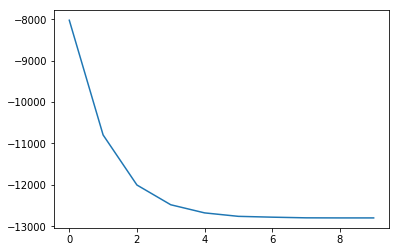

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

class Hopfield:
    def __init__(self, size=64, iter=10):
        self.iter = iter
        self.size = size
        self.W = np.zeros((size ** 2, size ** 2))

    def train(self, X):
        n = self.size ** 2
        for x in X:  # (-1,64*64)
            x = np.reshape(x, (n, 1))
            xT = np.reshape(x, (1, n))
            self.W += x * xT / n
        self.W[np.diag_indices_from(self.W)] = 0

    def test_one_frame(self, x):
        n = self.size ** 2
        x = np.reshape(x, (n,))
        energy = []
        for iter in range(self.iter):
            h = np.zeros((n,))
            for i in range(n):
                i = np.random.randint(n)
                h[i] = self.W[i, :].dot(x)
            x[h > 0] = 1
            x[h < 0] = -1
            energy.append(self.cal_energy(x))

        return np.resize(x, (self.size, self.size)), energy

    def cal_energy(self, x):
        n = self.size ** 2
        energy = np.sum(self.W.dot(x) * x)

        return -0.5 * energy


def show(x):
    img = np.where(x > 0, 255, 0).astype(np.uint8)
    cv.imshow("img", img)
    cv.waitKey(0)


if __name__ == "__main__":

    img = cv.imread(r"D:\resource\mizh\kazuma.jpg", 0)
    size = 160
    img = cv.resize(img, (size, size))
    x = np.where(img > 255 / 2.5, 1, -1)
    x_masked = x.copy()
    x_masked[size // 2:, :] = -1
    show(x_masked)
    model = Hopfield(size = size)
    model.train([x])
    y, energy = model.test_one_frame(x_masked)
    show(y)
    plt.plot(energy, label='energy')
    plt.show()
